# 🎧Analyzing User Engagement and Churn in Spotify
## Introduction
The project undertakes a comprehensive exploratory data analysis (EDA) of Spotify user engagement and listening behavior. In the highly competitive digital streaming market, understanding the factors that drive user interaction and, conversely, lead to churn is paramount for platform sustainability and growth.

The primary objective of this study is to leverage a dataset detailing user activities—including listening time, skip rates, and device preferences—to uncover patterns, correlations, and anomalies in user behavior. By grouping data across different countries and device types, we aim to:


1.Quantify Core Engagement: Determine average metrics like listening time and skip rates across key user segments.


2.Identify Behavioral Differences: Analyze how engagement metrics vary significantly between different device types (e.g., mobile vs. desktop) and geographical locations.


3.Establish a Foundation for Churn Prediction: Identify strong correlational relationships that can serve as predictive features for a future machine learning model aimed at anticipating customer churn.

Import Necessary Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [56]:
df=pd.read_csv(r'd:\\DataScience\\PROJECT\\Project SPOTIFY\\spotify_churn_dataset.csv')

Read 1st 5 rows

In [80]:
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,listening_time_minutes
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1,0.433333
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0,2.350000
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1,3.316667
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0,0.600000
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1,4.166667


Read last 5 Rows

In [81]:
df.tail()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,listening_time_minutes
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1,3.950000
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0,1.016667
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0,1.350000
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0,4.083333
7999,8000,Other,45,AU,Free,210,68,0.46,Desktop,6,0,0,3.500000


 Data Cleaning

In [59]:
#check the count of null values

df.isna().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [60]:
#check duplicates

df.duplicated().sum()

0

In [61]:
#Basic inforamtion about the dataset like column name,datatypes...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [62]:
#describe the dataset

(df.describe())

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


Data Understanding

In [63]:
#Q1 Average song listening time

avg_listening=df['listening_time'].mean()
print("Average song listening time:",avg_listening)

Average song listening time: 154.06825


In [64]:
#Q2 Total no. of songs played per day

total_play=df['songs_played_per_day'].sum()
print('Total no. of songs played per day',total_play)

Total no. of songs played per day 401018


In [65]:
#Q3 Total no. of male listeners

male_listners=df['gender'].value_counts()['Male']
print('Total no. of male listeners',male_listners)

Total no. of male listeners 2691


In [66]:
#Q4 Total no. of female listners

female_listners=df['gender'].value_counts()['Female']
print('Total no.female listners',female_listners)

Total no.female listners 2659


In [67]:
#Q5 Total no. of others who listners

other_listner=df['gender'].value_counts()['Other']
print('Total no. of others who listners',other_listner)

Total no. of others who listners 2650


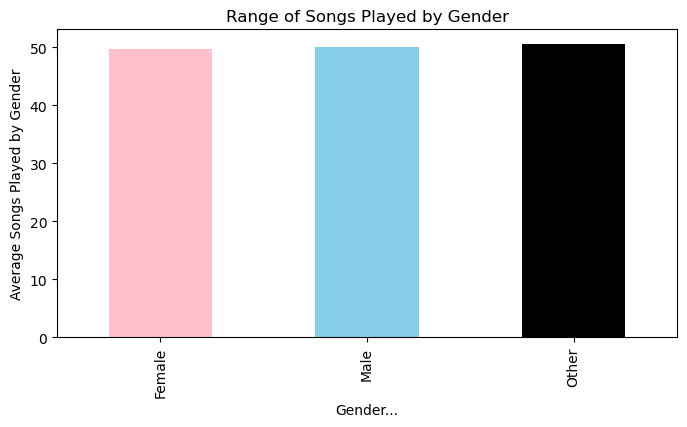

Total no.female listners- 2659 

Total no. of male listeners- 2691 

Total no. of others who listners- 2650


In [68]:
#Q6 Correlation btwin the song listning of various gender

corre_gender=df.groupby('gender')['songs_played_per_day'].mean()
plt.figure(figsize=(8,4))
corre_gender.plot(kind='bar',color=['pink','SkyBlue','Black'])
plt.title('Range of Songs Played by Gender')
plt.xlabel('Gender...')
plt.ylabel('Average Songs Played by Gender')
#plt.xticks(rotation=0)
plt.show()

#Count of each gender
female_listners=df['gender'].value_counts()['Female']
print('Total no.female listners-',female_listners,'\n')
male_listners=df['gender'].value_counts()['Male']
print('Total no. of male listeners-',male_listners,'\n')
other_listner=df['gender'].value_counts()['Other']
print('Total no. of others who listners-',other_listner)

In [69]:
#Q7 Types of subscriptions

print(df['subscription_type'].unique())

['Free' 'Family' 'Premium' 'Student']


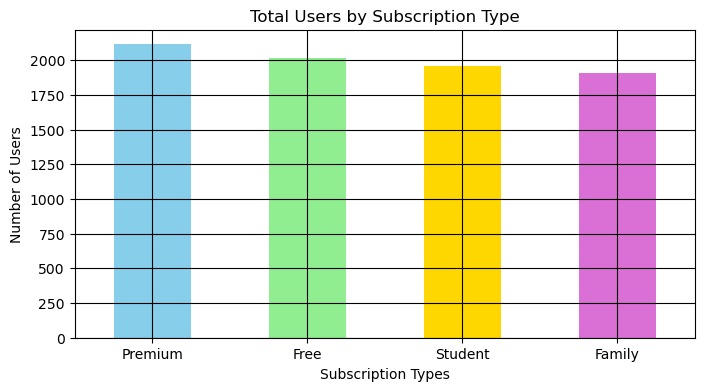

Total no. of Premium subscribed listeners- 2115 

Total no. of Subcription free listeners- 2018 

Total no. of student listeners- 1959 

Total no. of Family subcribed listeners- 1908 



In [70]:
#Q8 Range of users in different subscription types


sub_core= df['subscription_type'].value_counts()

plt.figure(figsize=(8,4))
sub_core.plot(kind='bar', color=["skyblue", "lightgreen", "gold", "orchid"])

plt.title('Total Users by Subscription Type')
plt.xlabel('Subscription Types')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(color='black')
plt.show()

Premium_listners=df['subscription_type'].value_counts()['Premium']
print('Total no. of Premium subscribed listeners-',Premium_listners,'\n')
Free_listners=df['subscription_type'].value_counts()['Free']
print('Total no. of Subcription free listeners-',Free_listners,'\n')
Student_listners=df['subscription_type'].value_counts()['Student']
print('Total no. of student listeners-',Student_listners,'\n')
Family_listners=df['subscription_type'].value_counts()['Family']
print('Total no. of Family subcribed listeners-',Family_listners,'\n')

In [71]:
#Q9 Type of devices used to use spotify


print(df['device_type'].unique())

['Desktop' 'Web' 'Mobile']


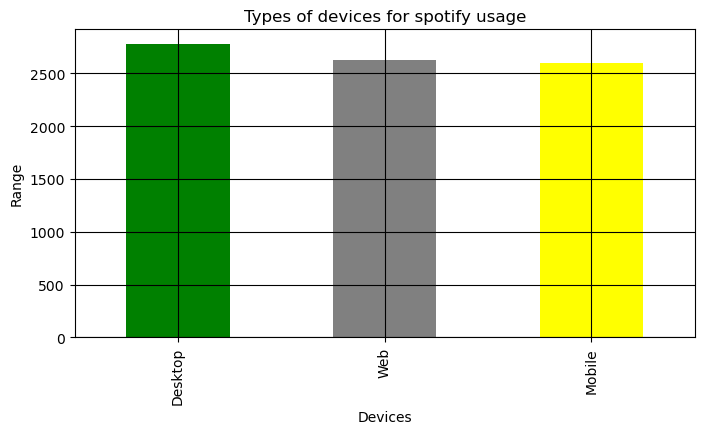

Total no. of desktop users- 2778 

Total no. of web users- 2623 

Total no. of mobile users- 2599 



In [72]:
#Q10 Range of users in different types of divices

dev_core=df['device_type'].value_counts()

plt.figure(figsize=(8,4))
dev_core.plot(kind='bar',color=['green','grey','yellow'])
plt.title('Types of devices for spotify usage')
plt.xlabel('Devices')
plt.ylabel('Range')
plt.grid(color='black')
plt.show()

desktop_users=df['device_type'].value_counts()['Desktop']
print('Total no. of desktop users-',desktop_users,'\n')

web_users=df['device_type'].value_counts()['Web']
print('Total no. of web users-',web_users,'\n')

Mobile_users=df['device_type'].value_counts()['Mobile']
print('Total no. of mobile users-',Mobile_users,'\n')

In [73]:
#Q11 Countries which are using spotify

print(df['country'].unique())

['CA' 'DE' 'AU' 'US' 'UK' 'IN' 'FR' 'PK']


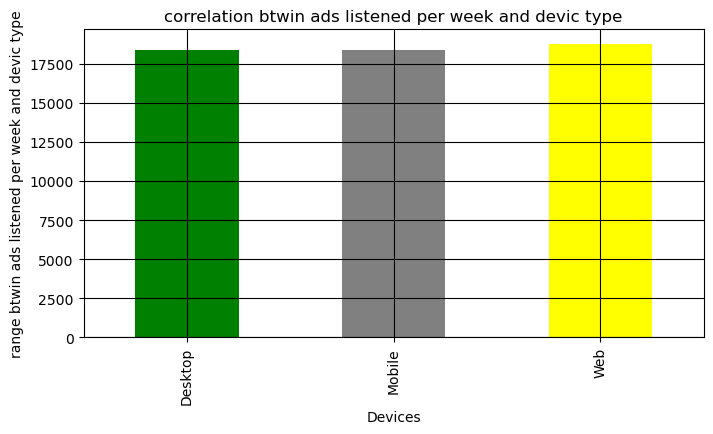

Total no. of desktop users who listnes ads- 18399 

Total no. of mobile users who listnes ads- 18391 

Total no. of web users who listnes ads- 18761


In [74]:
#Q12 correlation btwin ads listened per week and devic type


core_ad=df.groupby('device_type')['ads_listened_per_week'].sum()
plt.figure(figsize=(8,4))
#plt.boxplot(data, labels=labels, patch_artist=True)

core_ad.plot(kind='bar',color=['green','grey','yellow'])
plt.title('correlation btwin ads listened per week and devic type')
plt.xlabel('Devices')
plt.ylabel('range btwin ads listened per week and devic type')
plt.grid(color='black')
plt.show()

desktop_ads=df[df['device_type']=='Desktop']['ads_listened_per_week'].sum()
print('Total no. of desktop users who listnes ads-',desktop_ads,'\n')
mobile_ads=df[df['device_type']=='Mobile']['ads_listened_per_week'].sum()
print('Total no. of mobile users who listnes ads-',mobile_ads,'\n')  
web_ads=df[df['device_type']=='Web']['ads_listened_per_week'].sum()
print('Total no. of web users who listnes ads-',web_ads,)

device_type
Desktop    156.267099
Mobile     150.236245
Web        155.536409
Name: listening_time, dtype: float64


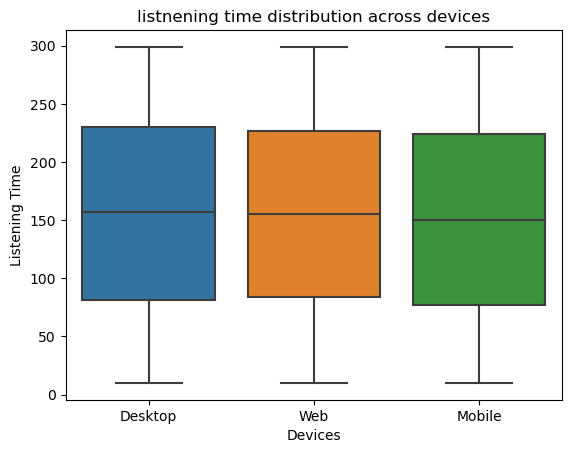

In [75]:
#Q13 listnening time distribution across devices


listen_time=df.groupby('device_type')['listening_time'].mean()
print(listen_time)

#plt.figure(figsize=(8,4))
sns.boxplot(x='device_type',y='listening_time',data=df)

plt.title('listnening time distribution across devices')
plt.xlabel('Devices')
plt.ylabel('Listening Time')
plt.show()

2071 

country
AU    266
CA    237
DE    277
FR    269
IN    246
PK    275
UK    239
US    262
Name: is_churned, dtype: int64


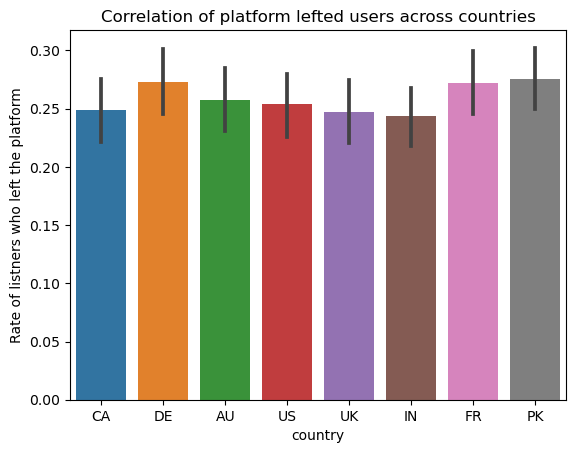

In [76]:
#Q14  Total no. of platform lefted listners and Rate of listners who left the platform across various countries


lefted_users=df['is_churned'].sum()
print(lefted_users,'\n')
left_listners=df.groupby('country')['is_churned'].sum()
print(left_listners)

sns.barplot(x='country',y='is_churned',data=df)
#lefted_users.plot(kind='bar',color=['green','grey','yellow'])


plt.title('Correlation of platform lefted users across countries')
plt.ylabel('Rate of listners who left the platform')
plt.show()

device_type
Desktop    0.299093
Mobile     0.297861
Web        0.303469
Name: skip_rate, dtype: float64


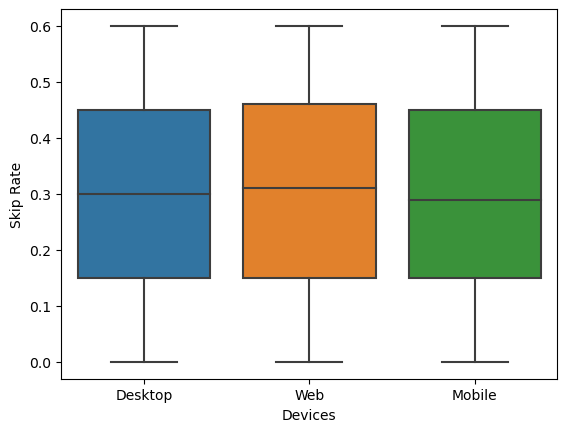

In [77]:
#Q15 average skip rate across varios devices


avg_skip=df.groupby('device_type')['skip_rate'].mean()
print(avg_skip)

sns.boxplot(x='device_type',y='skip_rate',data=df)
plt.xlabel('Devices')
plt.ylabel('Skip Rate')
plt.show()


In [78]:
#16 correlation btwin countries and play time


country_play=df.groupby('country')['listening_time'].sum()
df['listening_time_minutes']=df['listening_time'] / 60
print(country_play)


country
AU    157096
CA    145397
DE    159588
FR    153611
IN    156397
PK    152627
UK    147939
US    159891
Name: listening_time, dtype: int64


## Conclusion
 This exploratory data analysis successfully quantified key user engagement metrics and revealed significant behavioral variations within the Spotify user base.The project confirms that user engagement is a complex function of both geography and technology. While the analysis provides clear descriptive insights into where and how users engage, the ultimate goal of this research is to move beyond description and toward prediction.